# Introductory applied machine learning (INFR10069)

# Lab 0: Introduction

To complete this lab you should:

* Set up your IAML environment ready for the course (see [README](https://github.com/michael-camilleri/IAML2018))
* __Read the text__ and run all the cells in this notebook and have a play with all the objects created (Don't worry about messing up this notebook - you can always download another copy!)
* __Attempt all the Exercises at the bottom of the notebook__

# Setting up

Instructions for setting up can be found in the GitHub project [README](https://github.com/michael-camilleri/IAML2018). Please follow the instructions to the letter, then start a jupyter server and open this file to get started:

```{bash}
source activate py3iaml
jupyter notebook
# Your browser should open, navigate to this file and open it
```

# Introducing main packages

In the following sections we introduce the main **packages** we will be using in this course. If you think that you are already familiar with them, please feel free to skip to the excercises at the end of this notebook.

The packages that we will use are the following:
* [numpy](http://www.numpy.org/): scientific computing by using array objects


* [pandas](http://pandas.pydata.org/): data structures and data analysis tools


* [matplotlib](http://matplotlib.org/): plotting library (similar to MATLAB's plot interface)


* [seaborn](https://seaborn.github.io/index.html): data visualisation library which works on top of matplotlib

Throughout the course, we will also make heavy use of [scikit-learn](http://scikit-learn.org/0.19/) which is a machine learning library implementing many learning algorithms and useful tools. This is introduced in Lab 2.

## IPython / Jupyter environment ======

Basic knowledge of `python` is assumed for this course. If you haven't used python before, you are strongly advised to familiarise yourselves with basic python syntax and working in the Jupyter environment. There are many excellent tutorials available on the web and you can choose the ones you like the most. If you are not sure which ones to choose, these are good starting points:

[Introduction to Python for scientific computing](http://bebi103.caltech.edu/2015/tutorials/t1a_intro_to_python.html)

[Introduction to Jupyter notebooks](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html)

[Python/Numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/#python)
(A large part of Lab 1 is based on this tutorial)

**IMPORTANT**

All labs and assignments will be done in Jupyter Notebooks, so do ask questions if you're struggling.

### Basic operation and shortcuts

There are two modes of selection when inside a Jupyter Notebook:
    1. Command Mode - When you hit up/down arrows you select different cells. Hit enter to enter edit mode.
    1. Edit Mode - You can edit the cell. Hit Esc to enter Command Mode again.

In Command Mode (cell highlighted blue):
```
                h - bring up help window (contains full list of shortcuts!)
          <enter> - Enter Edit Mode
                a - create new cell above selected
                b - create cell below selected
             d, d - delete selected cell
```

In Edit Mode (cell highlighted green):
```
            <esc> - Enter Command Mode
<shift> + <enter> - Run cell and move to cell below in Command Mode
 <ctrl> + <enter> - Run cell in place

```

### Printing and cell output

A Jupyter notebook is a collection of code and text cells. Each code cell can be run and the output is given below the cell. A number appears at the side of the cell to indicate the order in which the cells were run. 

All objects created by running cells are stored in the kernel running in the background. You can restart the kernel by using the Kernel menu at the top of the notebook.

You'll notice that the notebook will try to display the last thing in the cell, even if you don't use a print statement. However, if you want to print multiple things from one cell, you need to use multiple print statements (or multiple cells).

In [6]:
a = 1
b = 2
a

1

In [7]:
a
b

2

In [8]:
print(a)
print(b)

1
2


### Connecting to the Kernel

Sometimes we might want to connect to the same notebook kernel from multiple frontends. This is useful for excecuting quick calculations, or checking objects currently stored in the kernel, without having to create a new cell in the notebook.

The `%connect_info` line magic displays the information necessary to connect another frontend to the Notebook kernel.

In [9]:
%connect_info

{
  "shell_port": 60637,
  "iopub_port": 55377,
  "stdin_port": 38889,
  "control_port": 33301,
  "hb_port": 35913,
  "ip": "127.0.0.1",
  "key": "ff1715f8-08ea030ea3d37fe7142f2f28",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-34b378b8-2ec5-478a-b4a6-f454fb48e954.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


For example, if this is the only kernel you have started, go to your terminal and execute:

* `jupyter console --existing` 

This will bring up a console that is connected to the same kernel as this notebook. This can be handy if you want to do some exploration of objects without creating new cells in the workbook.

#### **WARNING**

If you connect to a kernel via the console, be careful you do not kill the kernel when quitting the console. You must use:

* `<ctrl> + d`
* or `exit(keep_kernel=True)`

### Built-in magic commands

There are [many built-in magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html) (like `%connect_info`) which allow you to do other fun things with notebooks. Check them out.

### Tab completion

Tab completion is a powerful method for viewing object attributes and available methods.

Let's see an example of this by using a Python [list](http://www.tutorialspoint.com/python/python_lists.htm). We will create a list and then you can see what methods are available by typing the list name followed by `.` and then hitting the &lt;tab&gt; key. Then you can access any method's help documentation by hitting the method's name followed by `?`; this opens a 'pager' at the bottom of the screen, you can hit &lt;esc&gt; to exit it.

In [10]:
l = [1, 4.2, 'hello']
l

[1, 4.2, 'hello']

In [11]:
# type l. then hit <tab>
l.append(67)
l

[1, 4.2, 'hello', 67]

In [12]:
l.append?

## Import packages

It's generally good practice to import all your packages at the top of a file. We will do so in future tutorials.

Before we start, we need to import the packages that we will be using later. If you are having trouble importing any of these packages make sure that these are properly installed. If you still encounter issues, refer to Installing instructions.

In [13]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Numpy introduction =======

Numpy is a powerful scientific computing library. The fundmental object is the (n-dimensional) numpy array and the library provides a collection of tools for working with such arrays. If you are already familiar with MATLAB you might find this [tutorial](https://docs.scipy.org/doc/numpy-1.15.0/user/numpy-for-matlab-users.html) useful. 

The following Numpy introduction is largely based on this [tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy).

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a [tuple](http://www.tutorialspoint.com/python/python_tuples.htm) of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension. *N.B. this use of the word 'rank' is not the same as the meaning in linear algebra.*

We can initialize numpy arrays from nested Python [lists](http://www.tutorialspoint.com/python/python_lists.htm), and access elements using square brackets:

In [14]:
import numpy as np
a = np.array([1, 2, 3])  # Creates a rank 1 array (i.e. vector)
a

array([1, 2, 3])

In [15]:
type(a)  # Prints the type of object a (array)

numpy.ndarray

In [16]:
a.shape  # Prints the number of elements for each dimension

(3,)

In [17]:
print(a[0], a[1], a[2], a[-1], a[-2], a[-3])  # Select array elements by index (starts at 0)

1 2 3 3 2 1


In [18]:
try:
    a[3]  # Will error
except IndexError as e:
    print('{}'.format(e))
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

index 3 is out of bounds for axis 0 with size 3


In [19]:
a[0] = 5  # Change an element of the array

In [20]:
a

array([5, 2, 3])

In [21]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
b

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
b.shape          

(2, 3)

In [23]:
print(b[0, 0], b[0, 1], b[1, 0]) 

1 2 4


N.B. Python follows [0-based indexing](https://en.wikipedia.org/wiki/Zero-based_numbering) (as opposed to MATLAB which follows 1-based indexing).

### Creating arrays

We have many options here:

#### Set matrix types

Generally the first argument is simply the shape of the resulting array

In [24]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [25]:
np.ones((1, 2))

array([[1., 1.]])

In [26]:
np.full((2, 2), 7)

array([[7, 7],
       [7, 7]])

In [27]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [28]:
np.random.random((2, 2))

array([[0.21728721, 0.14736487],
       [0.59497935, 0.20667481]])

In [29]:
mu = 2
sigma = .2
np.random.normal(mu, sigma, (4,1)), np.random.normal(mu, sigma, 10)

(array([[2.09480039],
        [1.79995915],
        [2.04734556],
        [2.11296119]]),
 array([2.01708796, 1.94393336, 1.85767765, 2.13101228, 2.12524111,
        2.10083909, 2.12517563, 1.79807934, 2.17550896, 1.85446369]))

#### From a list

In [30]:
some_list = [1, 4, 6, 8]
e = np.array(some_list)
e

array([1, 4, 6, 8])

In [31]:
some_list = [[1, 4, 6, 8], [2, 2, 4, 4]]
f = np.array(some_list, dtype=float)
f

array([[1., 4., 6., 8.],
       [2., 2., 4., 4.]])

#### Appending an existing array

In [32]:
g = np.array([])
for ii in range(10):
    g = np.append(g, ii)
g

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

Be careful with types though, numpy will do some inference on your behalf...it may not be what you want/intended.

In [33]:
np.append(g, 'hello')

array(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', 'hello'], dtype='<U32')

In [34]:
e.dtype

dtype('int64')

In [35]:
np.append(e, 2.0)

array([1., 4., 6., 8., 2.])

In [36]:
np.append(e, 2.0).dtype

dtype('float64')

### Array indexing

Slicing is the most common way to index arrays. This works in a similar way to indexing python lists. 

There are also other options, such as integer and boolean array indexing.

In [37]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [38]:
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

In [39]:
a[0, 1]

2

A slice of an array is a view into the same data, so modifying it will modify the original array. For example: b[0, 0] is the same piece of data as a[0, 1]. Modifying b will modify a.

In [40]:
b[0, 0] = 77
a[0, 1]

77

We can also index particular entries based on some function, which we generally call masking. For example, we may want to zero out all even entries. To do so, we can do the following:

In [41]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) # Reinitialise a
a[a%2 == 0] = 0
a

array([[ 1,  0,  3,  0],
       [ 5,  0,  7,  0],
       [ 9,  0, 11,  0]])

Basically, the above can be interpeted as follows: ```a%2 == 0``` creates a boolean matrix of the same size as a where the entries are True/False depending on whether the corresponding entry in a is even or false (% is the modulus operator). Let us call this ```a_index```. Then we use this to index into the original a by ```a[a_index]``` and setting all such entries to 0. If we know the size of the indexing, then we can also do something more fancy such as:

In [42]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]], dtype=float) # Reinitialise a (enforce type float: see below)
a[a%2 == 0] = np.random.random((6))
a

array([[ 1.        ,  0.47535812,  3.        ,  0.83371448],
       [ 5.        ,  0.69689726,  7.        ,  0.371665  ],
       [ 9.        ,  0.08635171, 11.        ,  0.83556468]])

Going back to the issue of views. Note that b still points to the original matrix a and not the ones we just created: i.e. when we reassigned a to the new values, (```a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])```), we are only changing where a points... b still points to the original data.

In [43]:
b

array([[77,  3],
       [ 6,  7]])

### Array datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [44]:
x = np.array([1, 2])  # Let numpy choose the datatype
x.dtype     

dtype('int64')

In [45]:
x = np.array([1.0, 2.0])  # Let numpy choose the datatype
x.dtype         

dtype('float64')

In [46]:
x = np.array([1, 2], dtype=np.int64)  # Force a particular datatype
x.dtype            

dtype('int64')

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [47]:
x = np.array([[1, 2], [3, 4]], dtype=np.float64)
x

array([[1., 2.],
       [3., 4.]])

In [48]:
y = np.array([[5, 6], [7, 8]], dtype=np.float64)
y

array([[5., 6.],
       [7., 8.]])

#### Elementwise sum, equivalent expressions:

In [49]:
x + y

array([[ 6.,  8.],
       [10., 12.]])

In [50]:
np.add(x, y)

array([[ 6.,  8.],
       [10., 12.]])

#### Elementwise difference, equivalent expressions:

In [51]:
x - y

array([[-4., -4.],
       [-4., -4.]])

In [52]:
np.subtract(x, y)

array([[-4., -4.],
       [-4., -4.]])

#### Elementwise product, equivalent expressions:

In [53]:
x * y

array([[ 5., 12.],
       [21., 32.]])

In [54]:
np.multiply(x, y)

array([[ 5., 12.],
       [21., 32.]])

#### Elementwise division, equivalent expressions:

In [55]:
x / y

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

In [56]:
np.divide(x, y)

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

#### Elementwise square root

In [57]:
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

#### Dot product and matrix multiplicaiton

Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the `np.dot` function or `.dot` method to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [58]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
v = np.array([9, 10])
w = np.array([11, 12])

##### Inner product of vectors

In [59]:
np.dot(v, w)

219

##### Matrix vector product

In [60]:
x.dot(v)  # using x's method

array([29, 67])

In [61]:
np.dot(x, v)  # using the numpy function

array([29, 67])

##### Matrix matrix product

In [62]:
x.dot(y)  # using x's method

array([[19, 22],
       [43, 50]])

In [63]:
np.dot(x, y)  # using the numpy function

array([[19, 22],
       [43, 50]])

### Mathematical functions

Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [64]:
x = np.array([[1, 2], [3, 4]])
x

array([[1, 2],
       [3, 4]])

In [65]:
np.sum(x)  # Compute sum of all elements

10

In [66]:
np.sum(x, axis=0)  # Compute sum of each column - sum *over rows* i.e. dimension 0

array([4, 6])

In [67]:
np.sum(x, axis=1)  # Compute sum of each row - sum *over columns* i.e. dimension 1

array([3, 7])

You can find the full list of mathematical functions provided by numpy in the [documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.math.html).


Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [68]:
x = np.arange(4).reshape((2, 2))
x

array([[0, 1],
       [2, 3]])

In [69]:
x.T

array([[0, 2],
       [1, 3]])

In [70]:
np.transpose(x) # Equivalent expression

array([[0, 2],
       [1, 3]])

In [71]:
# Note that taking the transpose of a rank 1 array (a vector) does nothing:
v = np.array([1, 2, 3])
v

array([1, 2, 3])

In [72]:
v.T

array([1, 2, 3])

In [73]:
x.reshape((4, 1))

array([[0],
       [1],
       [2],
       [3]])

In [74]:
x.reshape((4,))

array([0, 1, 2, 3])

In [75]:
y = np.arange(27).reshape((3, 3, 3))
y

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [76]:
y.shape

(3, 3, 3)

In [77]:
y.reshape((3, -1))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26]])

In [78]:
y.reshape((3, -1)).shape

(3, 9)

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. 

In [79]:
x = np.arange(12).reshape((4, 3))
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [80]:
v = np.array([1, 0, 1])
v

array([1, 0, 1])

In [81]:
x + v  # Add v to each row of x using broadcasting

array([[ 1,  1,  3],
       [ 4,  4,  6],
       [ 7,  7,  9],
       [10, 10, 12]])

`x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

* If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
* The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
* The arrays can be broadcast together if they are compatible in all dimensions.
* After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.

So be careful with shapes...

In [82]:
y = x.T
y

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [83]:
try:
    y + v  # Add v to each column of y using broadcasting...?
except ValueError as e:
    print(e)
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

operands could not be broadcast together with shapes (3,4) (3,) 


And especially careful with vectors!

In [84]:
try:
    y + v.T  # Add v to each column of y using broadcasting...?
except ValueError as e:
    print(e)
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

operands could not be broadcast together with shapes (3,4) (3,) 


In [85]:
y + v.reshape((3, 1))  # Add v to each column of y using broadcasting!

array([[ 1,  4,  7, 10],
       [ 1,  4,  7, 10],
       [ 3,  6,  9, 12]])

In [86]:
print('x shape:', x.shape)
print('v shape:', v.shape)
print('y shape:', y.shape)

x shape: (4, 3)
v shape: (3,)
y shape: (3, 4)


### Numpy documentation

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](https://docs.scipy.org/doc/numpy-1.15.0/reference/) to find out much more about numpy.

## ======= Pandas introduction  =======

Pandas is a library for data manipulation and analysis. There are two fundamental data structures in pandas: the **Series** and **DataFrame** structures which are built on top of NumPy arrays.

The following introduction is largely based on this [tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/). Another useful referece is the [Pandas introduction to data structures](http://pandas.pydata.org/pandas-docs/version/0.23.4/dsintro.html). Pandas is well documented and you will find good information about all methods and structures in the [API reference](http://pandas.pydata.org/pandas-docs/version/0.23.4/api.html)

### Series

A **Series** a one-dimensional object (similar to a vector). Each element has a corresponding *index*. By default the indices range from 0 to N, where N is the length of the Series.

In [87]:
# Let's create a Series by passing in a list without specifying the indices.
s = pd.Series([1, 4.2, 'Hello'])
s

0        1
1      4.2
2    Hello
dtype: object

In [88]:
# Now, let's specify the indices explicitly
s = pd.Series([1, 4.2, 'Hello'], index=['A', 'B', 'C'])
s

A        1
B      4.2
C    Hello
dtype: object

In [89]:
# Indexing the Series
s['B']

4.2

In [90]:
# We can also index by using boolean logic (much like masking)
s = pd.Series([1, 4.2, 0.5, 3, 5.6], index=['A', 'B', 'C', 'D', 'E'])
s[s > 2]

B    4.2
D    3.0
E    5.6
dtype: float64

### DataFrame

A DataFrame is a tabular data structure comprised of rows and columns. You can also think of the DataFrame as a collection of Series objects that share an index. 

#### Creating DataFrame structures

We can create an empty DataFrame by specifying the column names. Then we can insert data row by row.

In [91]:
df = pd.DataFrame(columns=['Gender', 'Age', 'Height', 'Weight'])
df

,Gender,Age,Height,Weight


In [92]:
# Now let's add an observation
df.loc[0] = ['Male', 23, 180, 73]  # Note how we used .loc to specify the index
df.loc['A'] = ['Female', 27, 167, 59]
df

,Gender,Age,Height,Weight
0,Male,23,180,73
A,Female,27,167,59


You can populate using a dictionary too which allows you to do things in a nonstandard order...

In [93]:
df.loc['i'] = dict(Weight='3kgs', Age=10, Gender='Blue', Height=-12)
df

,Gender,Age,Height,Weight
0,Male,23,180,73
A,Female,27,167,59
i,Blue,10,-12,3kgs


#### Creating DataFrame from other structures

You can also create a dataframe from:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

For example:

In [94]:
# Create a DataFrame from a list
some_list = [['Male', 23, 180, 73], ['Female', 27, 167, 59]]
df = pd.DataFrame(some_list, index=[0, 'A'], columns=['Gender', 'Age', 'Height', 'Weight'])
df

,Gender,Age,Height,Weight
0,Male,23,180,73
A,Female,27,167,59


In [95]:
# Create a DataFrame from a dictionary where keys are column values
column_key_dict = {
    'Gender': ['Male', 'Female'],
    'Age': [23, 27],
    'Height': [180, 167],
    'Weight': [73, 59]
}
df = pd.DataFrame.from_dict(column_key_dict, orient='columns')
df.index = [0, 'A']
df

,Gender,Age,Height,Weight
0,Male,23,180,73
A,Female,27,167,59


In [96]:
# Create a DataFrame from a dictionary where keys are index values
index_key_dict = {0:['Male', 23, 180, 73], 'A':['Female', 27, 167, 59]}
df = pd.DataFrame.from_dict(index_key_dict, orient='index')
df.columns = ['Gender', 'Age', 'Height', 'Weight']
df

,Gender,Age,Height,Weight
0,Male,23,180,73
A,Female,27,167,59


In [97]:
# Using the DataFrame call, keys are assumed to be column headers
df = pd.DataFrame({0:['Male', 23, 180, 73], 'A':['Female', 27, 167, 59]}, 
                   index=['Gender', 'Age', 'Height', 'Weight'])
df

,0,A
Gender,Male,Female
Age,23,27
Height,180,167
Weight,73,59


We can also transpose using the `.T` method

In [98]:
df = df.T
df

,Gender,Age,Height,Weight
0,Male,23,180,73
A,Female,27,167,59


#### Loading a CSV into a DataFrame

Most commonly we create DataFrame structures by reading csv files. To run the following piece of code you will need the datasets associated with the course: these should have been downloaded with the code, and will exist adjacent to this notebook (i.e. within the `Labs` sub-directory):

In [99]:
cpu_loc = os.path.join(os.getcwd(), 'datasets', 'cpu.csv')
cpu_loc

'/afs/inf.ed.ac.uk/user/s15/s1515679/IAML/iaml2018/Labs/datasets/cpu.csv'

In [100]:
cpu = pd.read_csv(cpu_loc)
cpu.head() # Head shows the first few elements (unless specified otherwise) of the DataFrame

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,adviser,125.0,256.0,6000.0,256.0,16.0,128.0,199.0
1,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
2,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
3,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
4,amdahl,29.0,8000.0,16000.0,32.0,8.0,16.0,132.0


You should see that each observation in our dataset comprises 8 measurements (attributes).

#### Basic methods for DataFrame objects
* `head(N)`: displays the first N elements of the DataFrame
* `tail(N)`: displays the last N elements of the DataFrame
* `info()`:  displays basic information about the variables
* `describe()`: displays summary statistics of the data

Execute the following cells and observe the outputs.

In [101]:
cpu.tail(5)

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
204,sperry,124.0,1000.0,8000.0,0.0,1.0,8.0,37.0
205,sperry,98.0,1000.0,8000.0,32.0,2.0,8.0,50.0
206,sratus,125.0,2000.0,8000.0,0.0,2.0,14.0,41.0
207,wang,480.0,512.0,8000.0,32.0,0.0,0.0,47.0
208,wang,480.0,1000.0,4000.0,0.0,0.0,0.0,25.0


In [102]:
cpu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
vendor    209 non-null object
MYCT      209 non-null float64
MMIN      209 non-null float64
MMAX      209 non-null float64
CACH      209 non-null float64
CHMIN     209 non-null float64
CHMAX     209 non-null float64
ERP       209 non-null float64
dtypes: float64(7), object(1)
memory usage: 13.1+ KB


In [103]:
cpu.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1238.000000


#### Column Selection

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific **columns**.

In [104]:
cpu['MMAX'].head(5)

0     6000.0
1    32000.0
2    32000.0
3    32000.0
4    16000.0
Name: MMAX, dtype: float64

In [105]:
type(cpu['MMAX'])

pandas.core.series.Series

To select multiple columns we simply need to pass a list of column names. The resulting object is another DataFrame.

In [106]:
cpu[['MMIN', 'MMAX']].head(7)

,MMIN,MMAX
0,256.0,6000.0
1,8000.0,32000.0
2,8000.0,32000.0
3,8000.0,32000.0
4,8000.0,16000.0
5,8000.0,32000.0
6,16000.0,32000.0


In [107]:
type(cpu[['MMIN', 'MMAX']].head(7)) # This is a DataFrame

pandas.core.frame.DataFrame

#### Row selection

To select specific **observations (i.e. rows)** we need to pass in the corresponding indices. This operation is called *slicing*. The resulting structure is again a DataFrame.

In [108]:
cpu[0:3]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,adviser,125.0,256.0,6000.0,256.0,16.0,128.0,199.0
1,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
2,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0


In [109]:
# This is equivalent to using .iloc
cpu.iloc[0:3]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
0,adviser,125.0,256.0,6000.0,256.0,16.0,128.0,199.0
1,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0
2,amdahl,29.0,8000.0,32000.0,32.0,8.0,32.0,253.0


#### Filtering

Now suppose that you want to select all the observations which have an MMAX value which is higher than 35000. It is easy to do that:

In [110]:
cpu[cpu['MMAX'] > 35000]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
8,amdahl,23.0,16000.0,64000.0,64.0,16.0,32.0,749.0
9,amdahl,23.0,32000.0,64000.0,128.0,32.0,64.0,1238.0
198,sperry,30.0,8000.0,64000.0,96.0,12.0,176.0,919.0
199,sperry,30.0,8000.0,64000.0,128.0,12.0,176.0,978.0


Or equivalently:

In [111]:
cpu[cpu.MMAX > 35000]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
8,amdahl,23.0,16000.0,64000.0,64.0,16.0,32.0,749.0
9,amdahl,23.0,32000.0,64000.0,128.0,32.0,64.0,1238.0
198,sperry,30.0,8000.0,64000.0,96.0,12.0,176.0,919.0
199,sperry,30.0,8000.0,64000.0,128.0,12.0,176.0,978.0


Note that the concept is similar to the 'masking' we described for numpy arrays. You can also filter the data by using multiple attributes:

In [112]:
cpu[(cpu.MMAX > 35000) & (cpu.MMIN > 16000)]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
9,amdahl,23.0,32000.0,64000.0,128.0,32.0,64.0,1238.0


We saw before how we can select rows by passing the index numbers. This most of the time works but very often our indices are not in linear ascending order. 

There are two basic methods of indexing DataFrame structures:
* `loc`: works on labels in the index
* `iloc`: works on the position in the index (so it only takes integers)

Indeed, it is often safest to use the above methods (rather than just using square brackets as we have done above) to index into pandas dataframes. The following example should clarify the difference between label-based indexing (`loc`) and positional indexing (`iloc`)


In [113]:
# First let's create a new dataframe
cpu_new = cpu[cpu['MMAX'] > 35000]
cpu_new

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
8,amdahl,23.0,16000.0,64000.0,64.0,16.0,32.0,749.0
9,amdahl,23.0,32000.0,64000.0,128.0,32.0,64.0,1238.0
198,sperry,30.0,8000.0,64000.0,96.0,12.0,176.0,919.0
199,sperry,30.0,8000.0,64000.0,128.0,12.0,176.0,978.0


In [114]:
cpu_new.loc[8:10] # Looks for the rows which are labelled 8 and 9

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
8,amdahl,23.0,16000.0,64000.0,64.0,16.0,32.0,749.0
9,amdahl,23.0,32000.0,64000.0,128.0,32.0,64.0,1238.0


Note that we can also index into columns using `loc`, we just have to specify the second dimension (much like what we would do with numpy arrays):

In [115]:
cpu_new.loc[:, 'CACH']

8       64.0
9      128.0
198     96.0
199    128.0
Name: CACH, dtype: float64

In [116]:
cpu_new.iloc[0:2] # Look for the first and second rows (this yields the same result as before)

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
8,amdahl,23.0,16000.0,64000.0,64.0,16.0,32.0,749.0
9,amdahl,23.0,32000.0,64000.0,128.0,32.0,64.0,1238.0


In [117]:
cpu_new.iloc[:, 4] # And now using column indexing

8       64.0
9      128.0
198     96.0
199    128.0
Name: CACH, dtype: float64

In [118]:
# If we try the following we will get an empty DataFrame because there are no rows with labels 0 and 1.
cpu_new.loc[0:2]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP


In [119]:
# The result is always a DataFrame
type(cpu[0:2])

pandas.core.frame.DataFrame

A very common scenario will be the following. We want to select specific observations and columns of a DataFrame and convert to a NumPy array so that we can use it for feature extraction, classification etc. This can be achieved by using the `values` property (for an explanation of properties as opposed to methods, refer to [this](https://stackabuse.com/python-properties/)).

In [120]:
# Select the first 10 observations and the "MMIN" and "MMAX" columns only and convert to numpy array.
cpu[:10][['MMIN', 'MMAX']].values

array([[  256.,  6000.],
       [ 8000., 32000.],
       [ 8000., 32000.],
       [ 8000., 32000.],
       [ 8000., 16000.],
       [ 8000., 32000.],
       [16000., 32000.],
       [16000., 32000.],
       [16000., 64000.],
       [32000., 64000.]])

You can confirm that by using the `values` method the resulting object is a NumPy array.

#### A Further note on Indexing

*WARNING* - indexing is probably the most difficult part of pandas to get used to. If you get stuck [refer to the documentation on indexing](http://pandas.pydata.org/pandas-docs/version/0.23.4/indexing.html).


Summary of DataFrame methods for indexing:
* iloc - ignore index labels, index like numpy with integer positions
* loc - use index labels


To illustrate, observe what happens when we reorder the rows of our dataframe.

In [121]:
cpu.sort_values('ERP', inplace=True)

In [122]:
cpu.iloc[:10]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
99,ibm,480.0,96.0,512.0,0.0,1.0,1.0,15.0
14,bti,350.0,64.0,64.0,0.0,1.0,4.0,15.0
108,ibm,900.0,512.0,1000.0,0.0,1.0,2.0,17.0
122,ibm,1500.0,768.0,1000.0,0.0,0.0,0.0,18.0
107,ibm,900.0,1000.0,1000.0,0.0,1.0,2.0,18.0
102,ibm,1100.0,512.0,1500.0,0.0,1.0,1.0,18.0
46,dec,810.0,512.0,512.0,8.0,1.0,1.0,18.0
78,harris,300.0,192.0,768.0,6.0,6.0,24.0,18.0
66,hp,90.0,256.0,1000.0,0.0,3.0,10.0,18.0
62,four-phase,125.0,512.0,1000.0,0.0,8.0,20.0,19.0


In [123]:
cpu.loc[:10]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
99,ibm,480.0,96.0,512.0,0.0,1.0,1.0,15.0
14,bti,350.0,64.0,64.0,0.0,1.0,4.0,15.0
108,ibm,900.0,512.0,1000.0,0.0,1.0,2.0,17.0
122,ibm,1500.0,768.0,1000.0,0.0,0.0,0.0,18.0
107,ibm,900.0,1000.0,1000.0,0.0,1.0,2.0,18.0
102,ibm,1100.0,512.0,1500.0,0.0,1.0,1.0,18.0
46,dec,810.0,512.0,512.0,8.0,1.0,1.0,18.0
78,harris,300.0,192.0,768.0,6.0,6.0,24.0,18.0
66,hp,90.0,256.0,1000.0,0.0,3.0,10.0,18.0
62,four-phase,125.0,512.0,1000.0,0.0,8.0,20.0,19.0


Observe what happens if we change the label of one of the now first index

In [124]:
cpu = cpu.rename(index={cpu.index[0]: 'A'})

In [125]:
cpu.iloc[:10]

,vendor,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
A,ibm,480.0,96.0,512.0,0.0,1.0,1.0,15.0
14,bti,350.0,64.0,64.0,0.0,1.0,4.0,15.0
108,ibm,900.0,512.0,1000.0,0.0,1.0,2.0,17.0
122,ibm,1500.0,768.0,1000.0,0.0,0.0,0.0,18.0
107,ibm,900.0,1000.0,1000.0,0.0,1.0,2.0,18.0
102,ibm,1100.0,512.0,1500.0,0.0,1.0,1.0,18.0
46,dec,810.0,512.0,512.0,8.0,1.0,1.0,18.0
78,harris,300.0,192.0,768.0,6.0,6.0,24.0,18.0
66,hp,90.0,256.0,1000.0,0.0,3.0,10.0,18.0
62,four-phase,125.0,512.0,1000.0,0.0,8.0,20.0,19.0


In [126]:
try:
    cpu.loc[:10]
except TypeError as e:
    print(e)

cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [10] of <class 'int'>


For more, check out [Advanced Indexing](http://pandas.pydata.org/pandas-docs/version/0.23.4/advanced.html)

## Matplotlib introduction

Matplotlib is a 2D python plotting library with a similar interface to MATLAB's plot engine. The library is fully compatible with NumPy which means that we can -and most of the times will- pass numpy arrays as input arguments to the various plotting functions.

There are many [resources](http://matplotlib.org/resources/index.html) for learning how to use Matplotlib. The following examples demonstrate only some basic plotting functions. When you are looking for a particular feature which you don't know yet how to implement a web search can prove very useful.

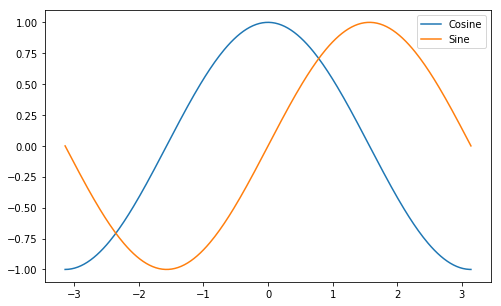

In [127]:
# The first example creates a sine and a cosine and plots them.
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # Evenly spaced numbers over the specified interval
C, S = np.cos(X), np.sin(X) # Create a sine (S) and a cosine (C)

plt.figure(figsize=(8,5)) # Instantiates figure with a specified size
plt.plot(X,C, label='Cosine')
plt.plot(X,S, label='Sine')
plt.legend() # Displays legend
plt.show()

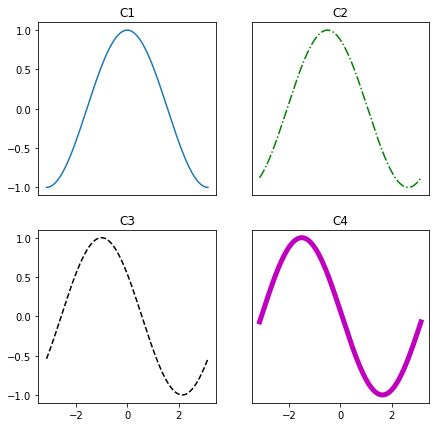

In [128]:
# Create 4 subplots and plot cosines with different colours, linestyels and linewidths.
X = np.linspace(-np.pi, np.pi, 256,endpoint=True) # Evenly spaced numbers over the specified interval
C1, C2, C3, C4 = np.cos(X), np.cos(X+0.5), np.cos(X+1.), np.cos(X+1.5)

fig, ax = plt.subplots(figsize=(7,7))
plt.subplot(2,2,1)
plt.plot(X, C1)
plt.title('C1')
plt.xticks([]) # Removes xticks
plt.subplot(2,2,2)
plt.plot(X, C2, color='green',  linestyle='-.')
plt.title('C2')
plt.xticks([]) # Removes xticks
plt.yticks([]) # Removes yticks
plt.subplot(2,2,3)
plt.plot(X, C3, color='k', linestyle='--')
plt.title('C3')
plt.subplot(2,2,4)
plt.plot(X, C4, color='m', linewidth = 5.)
plt.title('C4')
plt.yticks([]) # Removes yticks
plt.show()

Another way to reference subplots is using the Axes objects. This code acheives the same thing as above but, instead of using the package api functions, it uses the Axes object methods:

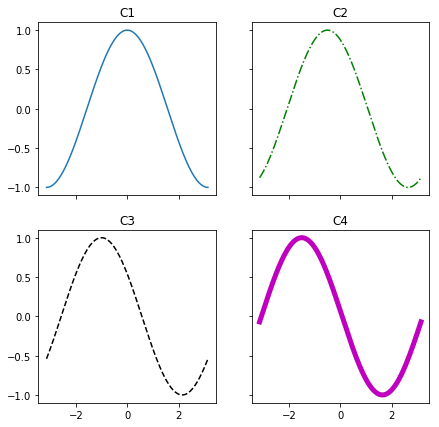

In [129]:
fig, ax = plt.subplots(2, 2, figsize=(7,7), sharex=True, sharey=True)
# ax is a 2 x 2 numpy array at this point containing the Axes objects
ax = ax.flatten()  # this simply flattens the array such that we can reference by a single index
ax[0].plot(X, C1)
ax[0].set_title('C1')
ax[1].plot(X, C2, color='green',  linestyle='-.')
ax[1].set_title('C2')
ax[2].plot(X, C3, color='k', linestyle='--')
ax[2].set_title('C3')
ax[3].plot(X, C4, color='m', linewidth = 5.)
ax[3].set_title('C4')
plt.show()

**N.B. Because we created the subplots up front and stated the axes should be the same, matplotlib intelligently labels the axes for us**

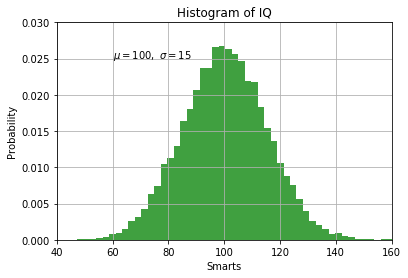

In [130]:
# Plot a histogram and add some text
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) # Generate data from a normal distribution with mean mu and variance sigma

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') # Adds some text by using TeX
plt.axis([40, 160, 0, 0.03]) # Sets the axes limits
plt.grid(True) # Enables grid
plt.show()

## Seaborn

[Seaborn](https://seaborn.github.io/index.html) is a visualisation library built on top of matplotlib which offers some aesthetic enhancement and, more importantly, provides some high-level functions for  "exploring and understanding data". Seaborn is also tightly integrated with pandas and provides support for both numpy and pandas data structures.

### Aesthetics

Firstly note that when you import and use seaborn, it may change the aesthetics of all matplotlib plots you make subsequently. If you only ever want to use matplotlib defaults, you can import seaborn like this: `import seaborn.apionly as sns`. 

To reset to matplotlib defaults, use: `sns.reset_defaults()`

There's some really useful stuff you can do with seaborn, especially with respect to setting default sizings with respect to the context in which you're producing plots. With one function, seaborn can make plots appropriate for posters, papers, notebooks, or talks. For further information see the [seaborn documentation on aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

### Seaborn implemented functions [Optional]
The Seaborn website has many great examples. Below we show a few taken directly from the website. These are just to give you a flavour of the kinds of things that Seaborn can do. You can use it as reference later; by no means should you learn this code by heart! You should definitely not worry if some of the following commands do not make sense just yet.

In [131]:
# Load the example titanic dataset
df = sns.load_dataset("titanic")

Let us first see how Seaborn can render the same visualisation in different formats, depending on intended medium (*ignore any warnings that come up*):

/afs/inf.ed.ac.uk/user/s15/s1515679/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


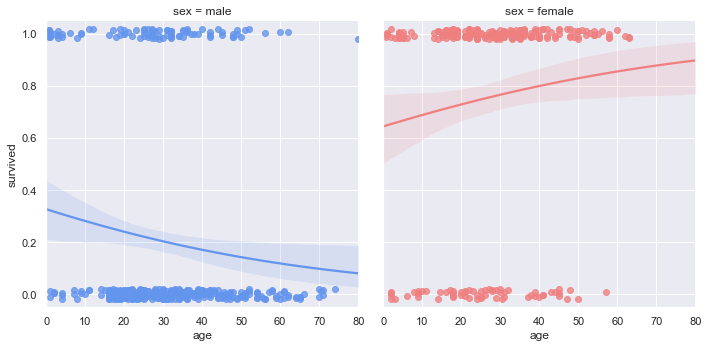

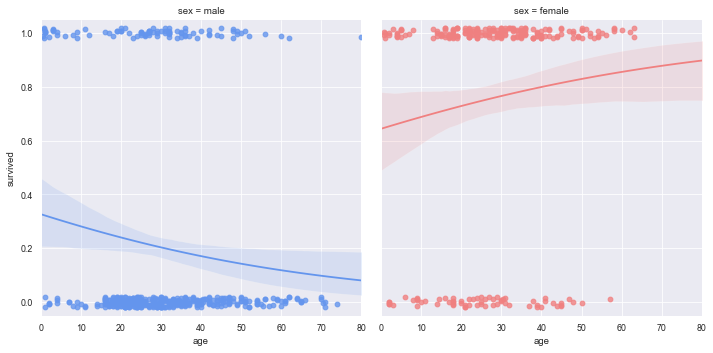

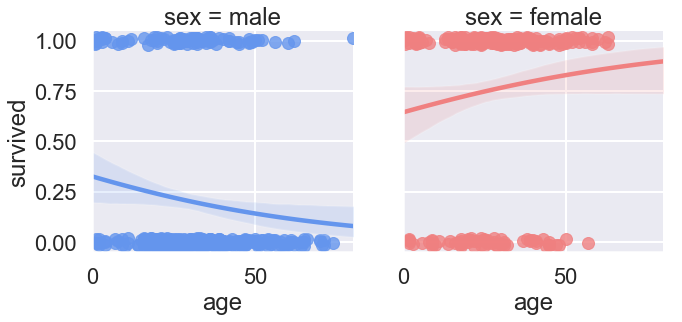

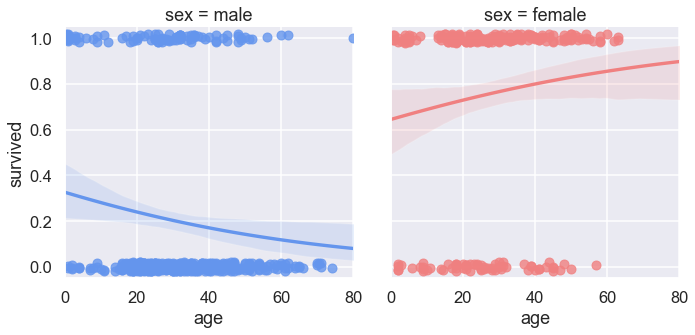

In [132]:
# Make a custom palette with gendered colors
pal = {"male":"#6495ED", "female": "#F08080"}

with sns.axes_style(style="darkgrid"):
    for context in ['notebook', 'paper', 'poster', 'talk']:
        with sns.plotting_context(context):
            # Show the survival proability as a function of age and sex
            g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
                           palette=pal, y_jitter=.02, logistic=True)
            g.set(xlim=(0, 80), ylim=(-.05, 1.05))
            plt.show()

/afs/inf.ed.ac.uk/user/s15/s1515679/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


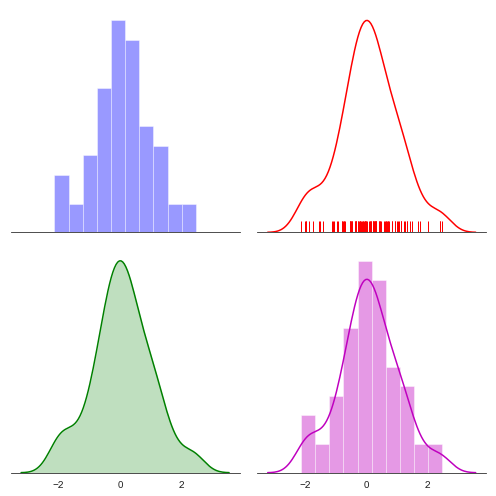

In [133]:
# using a with statement means style defaults are not overridden
with sns.axes_style(style="white", rc=dict(palette="muted", color_codes=True)):
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = rs.normal(size=100)

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

    # Plot a historgram and kernel density estimate
    sns.distplot(d, color="m", ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()
    plt.show()

/afs/inf.ed.ac.uk/user/s15/s1515679/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


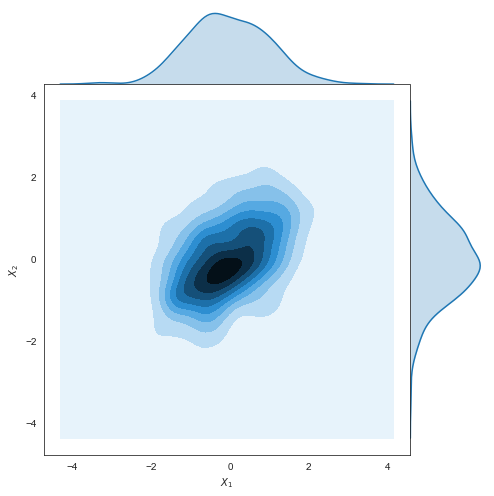

In [134]:
with sns.axes_style(style="white"):

    # Generate a random correlated bivariate dataset
    rs = np.random.RandomState(5)
    mean = [0, 0]
    cov = [(1, .5), (.5, 1)]
    x1, x2 = rs.multivariate_normal(mean, cov, 500).T
    x1 = pd.Series(x1, name="$X_1$")
    x2 = pd.Series(x2, name="$X_2$")

    # Show the joint distribution using kernel density estimation
    g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)
    plt.show()

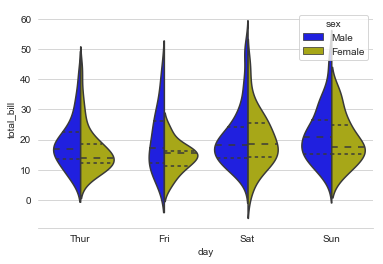

In [135]:
with sns.axes_style(style="whitegrid", rc=dict(palette="pastel", color_codes=True)):
    # Load the example tips dataset
    tips = sns.load_dataset("tips")

    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
                   inner="quart", palette={"Male": "b", "Female": "y"})
    sns.despine(left=True)
    plt.show()

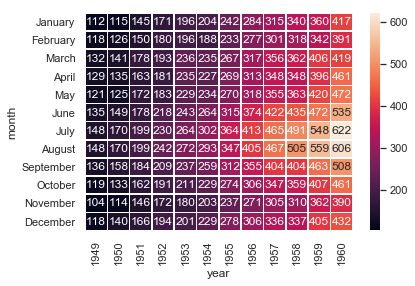

In [136]:
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)
plt.show()

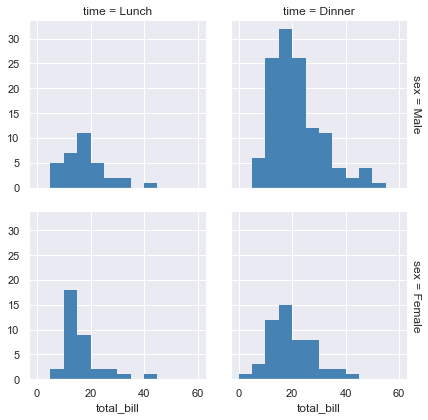

In [137]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)
plt.show()

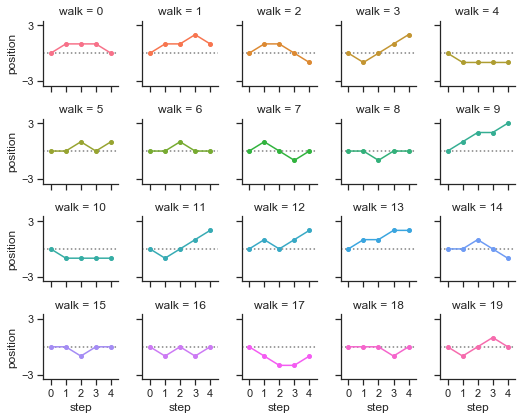

In [138]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.show()

# ======= Exercises =======

## Numpy exercises

The following short exercises test your understanding of simple numpy functions and objects. Make sure you can complete them and feel free to reference the official [documentation](http://docs.scipy.org/doc/) should you need it.

**You may need to google some solutions**

#### ========== Question 1 ==========
Print your numpy version.

In [139]:
# Your Code goes here:
np.__version__

'1.15.0'

#### ========== Question 2 ==========
Create a zero vector of size 5.

In [140]:
# Your Code goes here:
np.zeros(5)

array([0., 0., 0., 0., 0.])

#### ========== Question 3 ==========
Create a zero vector of size 5 of type integer. Set the third element to 1.

In [141]:
# Your Code goes here:
a = np.zeros(5, dtype="int64")
a[2] = 1
a

array([0, 0, 1, 0, 0])

#### ========== Question 4 ==========
Create a vector ranging from 0 to 9. 

In [142]:
# Your Code goes here:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### ========== Question 5 ==========
Create a vector ranging from 10 to 29.

In [143]:
# Your Code goes here:
np.arange(10,30)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])

#### ========== Question 6 ==========
Create a vector ranging from 0 to 9 and reverse it.

In [144]:
# Your Code goes here:
np.arange(10)[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

#### ========== Question 7 ==========
Create a 5 x 3 zero matrix.

In [145]:
# Your Code goes here:
np.zeros((5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### ========== Question 8 ==========
Create this matrix...without copy pasting it ;)
```
array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])
```

In [146]:
# Your Code goes here:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### ========== Question 9 ==========
Create a 3 X 3 identity matrix.

In [147]:
# Your Code goes here:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### ========== Question 10 ==========
Create a 2 X 2 X 2 array with random values (drawn from a normal distribution).

In [148]:
# Your Code goes here:
np.random.random((2,2,2))
#.normal?

array([[[0.66336232, 0.41266948],
        [0.50897387, 0.98845   ]],

       [[0.58322564, 0.4832768 ],
        [0.22100333, 0.78193494]]])

#### ========== Question 11a ==========
Create a 5 x 4 array with random values and find the minimum and maximum values.

In [149]:
# Your Code goes here:
a = np.random.random((5,4))
print(a)
print(a.max())
print(a.min())

[[0.45749927 0.31640099 0.31256555 0.34148882]
 [0.08703318 0.24742515 0.69767457 0.64748071]
 [0.07500129 0.85009217 0.81528102 0.17328847]
 [0.09128747 0.16236526 0.26444952 0.48317621]
 [0.4212399  0.59777934 0.94433651 0.48436537]]
0.9443365127063569
0.07500128788827354


#### ========== Question 11b ==========
Return the *index* (i.e. the location within the matrix) of the max or min values

In [150]:
# Your Code goes here:
print(a.argmax())
print(a.argmin())

18
8


#### ========== Question 12 ==========
Find the mean value of the array in 11.

In [151]:
# Your Code goes here:
np.mean(a)

0.4235115376031965

#### ========== Question 13 ==========
Find the row means of the array in 11.

In [152]:
# Your Code goes here:
np.mean(a, axis=1)

array([0.35698866, 0.4199034 , 0.47841574, 0.25031962, 0.61193028])

#### ========== Question 14 ==========
Find the column means of the array in 11.

In [153]:
# Your Code goes here:
np.mean(a, axis=0)

array([0.22641222, 0.43481258, 0.60686143, 0.42595992])

#### ========== Question 15 ==========
Create a list with elements 2.2, 3.5, 0, 4, 0. and convert into numpy array. Find the indices of non-zero elements.

In [154]:
# Your Code goes here:
b = [2.2, 3.5, 0, 4, 0.]
b = np.array(b)
np.nonzero(b)

(array([0, 1, 3]),)

#### ========== Question 16 ==========
Crate two normally distributed random matrices of shape (5, 4) and (4, 2). Print their matrix product.

In [155]:
# Your Code goes here:
a = np.random.random((5,4))
b = np.random.random((4,2))
np.dot(a,b)

array([[1.12242796, 1.45956823],
       [1.15757079, 1.43713329],
       [1.16629594, 1.01117313],
       [1.03901087, 1.1354717 ],
       [0.38013505, 0.77866787]])

#### ========== Question 17 ==========
Crate a random matrix of shape (5, 3) and a random vector of size 3. Use broadcasting to add the two arrays.

In [156]:
# Your Code goes here:
a = np.random.random((5,3))
b = np.random.random(3)
a + b

array([[1.27928848, 1.06513681, 1.37540703],
       [1.57445039, 0.89912438, 1.0851902 ],
       [1.68581766, 1.18479851, 1.31723647],
       [0.99691046, 1.02864814, 1.51945079],
       [1.3537932 , 1.34619656, 0.78099997]])

## Pandas exercises

#### ========== Question 18 ==========
Load the `credit` dataset and display the dataset basic information.

In [157]:
# Your Code goes here:
credit_loc = os.path.join(os.getcwd(), 'datasets', 'credit.csv')
credit = pd.read_csv(credit_loc)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 21 columns):
CheckingAccount     1001 non-null object
Duration            1001 non-null float64
CreditHistory       1001 non-null object
Purpose             1001 non-null object
CreditAmount        1001 non-null float64
SavingsAccount      1001 non-null object
YearsEmployed       1001 non-null object
InstallmentRate     1001 non-null float64
PersonalStatus      1001 non-null object
OtherDebtors        1001 non-null object
ResidentSince       1001 non-null float64
Property            1001 non-null object
Age                 1001 non-null float64
OtherPlans          1001 non-null object
Housing             1001 non-null object
NumCreditsAtBank    1001 non-null float64
Job                 1001 non-null object
Dependents          1001 non-null float64
Telephone           1001 non-null object
Foreign             1001 non-null object
Approve             1001 non-null object
dtypes: float64(7), objec

#### ========== Question 19 ==========
Display the summary statistics of the attributes of the dataset.

In [158]:
# Your Code goes here:
credit.describe()

,Duration,CreditAmount,InstallmentRate,ResidentSince,Age,NumCreditsAtBank,Dependents
count,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,20.882118,-9.957330e+05,-7.019980,2.842158,35.217782,0.406593,0.969031
std,12.070878,3.160708e+07,316.165715,1.106825,15.398264,31.656714,5.894916
min,0.000000,-1.000000e+09,-10000.000000,0.000000,-293.000000,-1000.000000,-185.000000
25%,12.000000,1.364000e+03,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2.319000e+03,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3.972000e+03,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,1.842400e+04,4.000000,4.000000,75.000000,4.000000,2.000000


#### ========== Question 20 ==========
Display the last 6 instances of the dataset.

In [159]:
# Your Code goes here:
credit.tail(6)

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
995,none,12.0,ok_til_now,car_new,2390.0,unknown,>=7,4.0,male_single,none,...,car,50.0,none,own,1.0,skilled,1.0,yes,yes,good
996,none,12.0,ok_til_now,furniture,1736.0,<100,<7,3.0,female,none,...,real_estate,31.0,none,own,1.0,unskilled,1.0,no,yes,good
997,<0,30.0,ok_til_now,car_used,3857.0,<100,<4,4.0,male_divorced,none,...,savings,40.0,none,own,1.0,management,1.0,yes,yes,good
998,none,12.0,ok_til_now,television,804.0,<100,>=7,4.0,male_single,none,...,car,38.0,none,own,1.0,skilled,1.0,no,yes,good
999,<0,45.0,ok_til_now,television,1845.0,<100,<4,4.0,male_single,none,...,unknown,23.0,none,free,1.0,skilled,1.0,yes,yes,bad
1000,<200,45.0,critical,car_used,4576.0,<500,unemployed,3.0,male_single,none,...,car,27.0,none,own,1.0,skilled,1.0,no,yes,good


#### ========== Question 21 ==========
Print the 5th observation

In [160]:
# Your Code goes here:
credit[4:5]

,CheckingAccount,Duration,CreditHistory,Purpose,CreditAmount,SavingsAccount,YearsEmployed,InstallmentRate,PersonalStatus,OtherDebtors,...,Property,Age,OtherPlans,Housing,NumCreditsAtBank,Job,Dependents,Telephone,Foreign,Approve
4,<0,42.0,ok_til_now,furniture,7882.0,<100,<7,2.0,male_single,guarantor,...,savings,45.0,none,free,1.0,skilled,2.0,no,yes,good


#### ========== Question 22 ==========
Print the standard deviation of the attribute `CreditAmount` by using the numpy method `std`. You can verify you get the correct result by inspecting the statistics table from Question 19.

In [161]:
# Your Code goes here:
credit.std()[1:2]

CreditAmount    3.160708e+07
dtype: float64

## Matplotlib exercises

#### ========== Question 23 ==========
Initialise an empty figure of size (8,6). Create a scatter plot of the observations in the `credit` dataset for the attributes `Duration` and `Age` (age should be shown on the xaxis). Use black coloured markers. Label the axes accordingly by using red colour for the xaxis and green for the yaxis. Finally, add a title of your choice by using a font size of 20. 

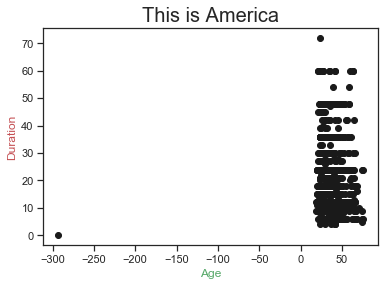

In [166]:
# Your Code goes here:
X = np.linspace(0,10,30)
D, A = credit['Duration'].values, credit['Age'].values

plt.scatter(A, D, color='k')
plt.xlabel('Age', color='g')
plt.ylabel('Duration', color='r')
plt.title("This is America", size=20)
plt.show()

#### ========== Question 24 ==========
You should note above that there is an outlier (i.e. an observation that is very distant to the other observations). Now you think that there must be something wrong with that observation (why?) and as a next step you should remove it from both the age and duration variables and a make a scatter plot of the new data.

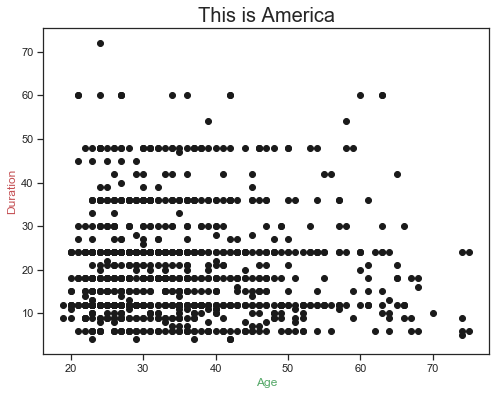

In [176]:
# Your Code goes here:
neg_age_idx = np.argwhere(A<0)
A = np.delete(A, neg_age_idx)
D=np.delete(D, neg_age_idx)
plt.figure(figsize=(8,6))
plt.scatter(A, D, color='k')
plt.xlabel('Age', color = 'g')
plt.ylabel('Duration', color = 'r')
plt.title("This is America", size=20)
plt.show()